PARCIAL 2 

VISUALIZACION COMUNIDADES (ALGORITMO DE LOUVAIN)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import random
import networkx as nx
import pandas as pd

In [2]:
df= pd.read_csv("World.csv")
df.head()

Origen          Destino  ConexionAeropuertos
0  Papua New Guinea        Australia                   19
1  Papua New Guinea      Philippines                    5
2  Papua New Guinea        Indonesia                    2
3  Papua New Guinea  Solomon Islands                    2
4  Papua New Guinea        Hong Kong                    2

In [3]:
flights_graph = nx.from_pandas_edgelist(df, source= "Origen",target= "Destino")

In [4]:
print(flights_graph)

Graph with 229 nodes and 2852 edges


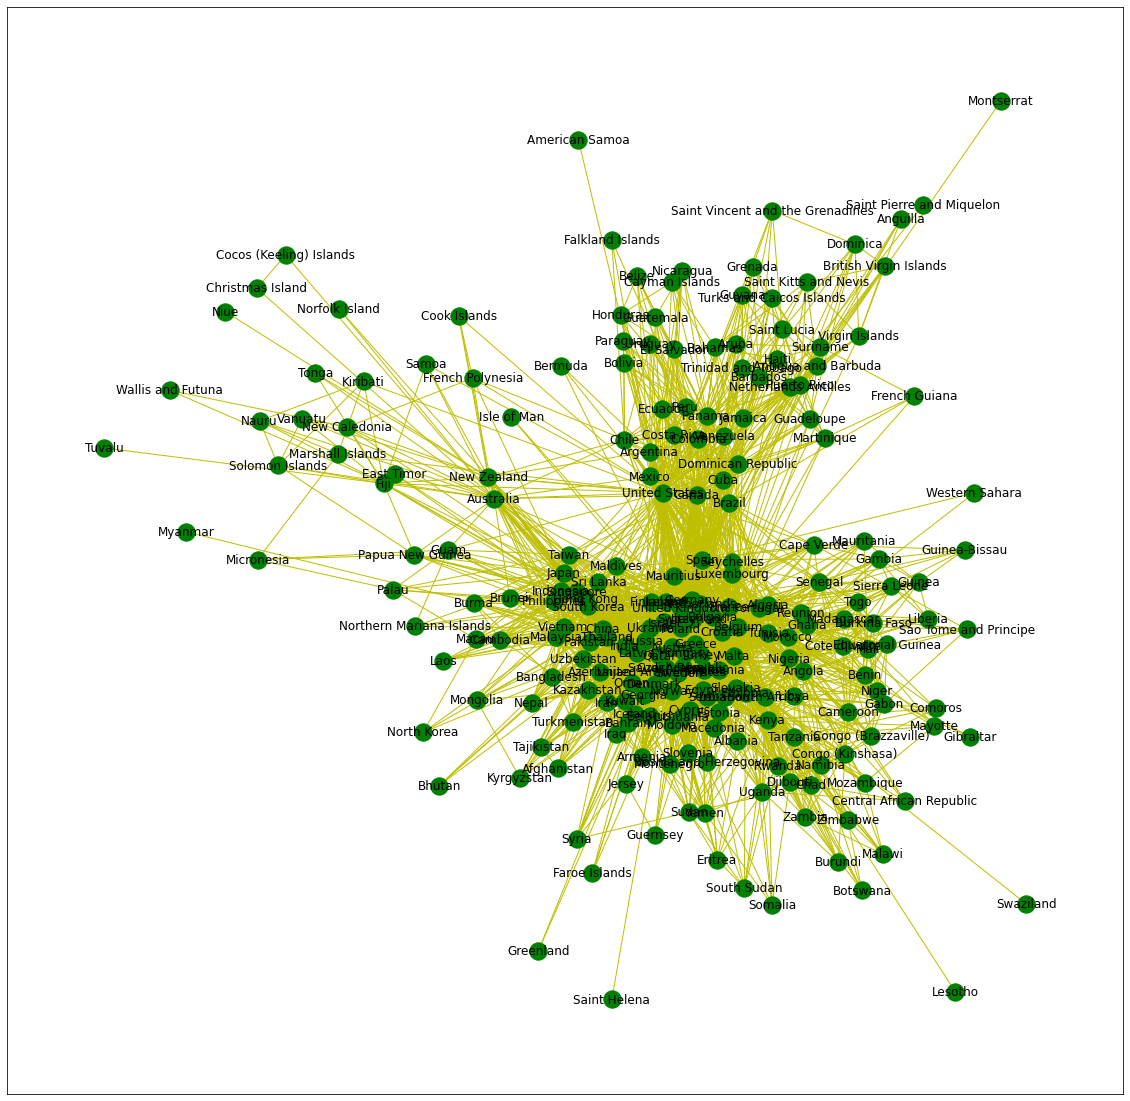

In [6]:
plt.figure(figsize=(20,20))
nx.draw_networkx(flights_graph, with_labels = True, node_color= 'g', edge_color='y')


In [44]:
import community 
from community import community_louvain
partition = community_louvain.best_partition(flights_graph)
count=list(set([i for i in partition.values()]))
print("Cantidad de comunidades detectadas:",len(count))

Cantidad de comunidades detectadas: 4


In [45]:
community_0=[]
community_1=[]
community_2=[]
community_3=[]
communities=[]
for i in partition.items():
     if i[1]==0:
          community_0.append(i[0])
     if i[1]==1:
          community_1.append(i[0])
     if i[1]==2:
          community_2.append(i[0])
     if i[1]==3:
          community_3.append(i[0])    

communities.append(community_0)
communities.append(community_1) 
communities.append(community_2) 
communities.append(community_3)           

In [46]:

for i in range(len(communities)):
    print("Comunidad ------>",i,":\n",communities[i])

Comunidad ------> 0 :
 ['United States', 'Canada', 'Spain', 'Antigua and Barbuda', 'Aruba', 'Dominican Republic', 'Bermuda', 'Barbados', 'Colombia', 'Cuba', 'Mexico', 'Martinique', 'Cayman Islands', 'Bahamas', 'Grenada', 'Brazil', 'Jamaica', 'Peru', 'Costa Rica', 'Haiti', 'Turks and Caicos Islands', 'Guadeloupe', 'Chile', 'Saint Lucia', 'El Salvador', 'Guyana', 'Trinidad and Tobago', 'Panama', 'Saint Pierre and Miquelon', 'Puerto Rico', 'Netherlands Antilles', 'Belize', 'Argentina', 'Saint Kitts and Nevis', 'Venezuela', 'Falkland Islands', 'Ecuador', 'Suriname', 'Guatemala', 'Western Sahara', 'Bolivia', 'Uruguay', 'Paraguay', 'Honduras', 'French Guiana', 'Virgin Islands', 'British Virgin Islands', 'Nicaragua', 'American Samoa', 'Anguilla', 'Dominica', 'Montserrat', 'Saint Vincent and the Grenadines']
Comunidad ------> 1 :
 ['France', 'Turkey', 'Algeria', 'Morocco', 'Ethiopia', 'Tunisia', "Cote d'Ivoire", 'Mali', 'Senegal', 'Niger', 'Burkina Faso', 'Libya', 'Mauritania', 'Benin', 'Togo'

In [47]:
for i in range(len(communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(communities[i]))


Cantidad de nodos en la comunidad --------> 0 : 53
Cantidad de nodos en la comunidad --------> 1 : 56
Cantidad de nodos en la comunidad --------> 2 : 69
Cantidad de nodos en la comunidad --------> 3 : 51


In [51]:
def visualizar(community, number, node_color):
    G=nx.Graph()
    G=flights_graph.subgraph(list(community))
    print(number,"\n")
    plt.figure(figsize=(20,20))
    nx.draw_networkx(G, with_labels = True, node_color= node_color, edge_color='m')

Visualizacion Comunidad:
0 



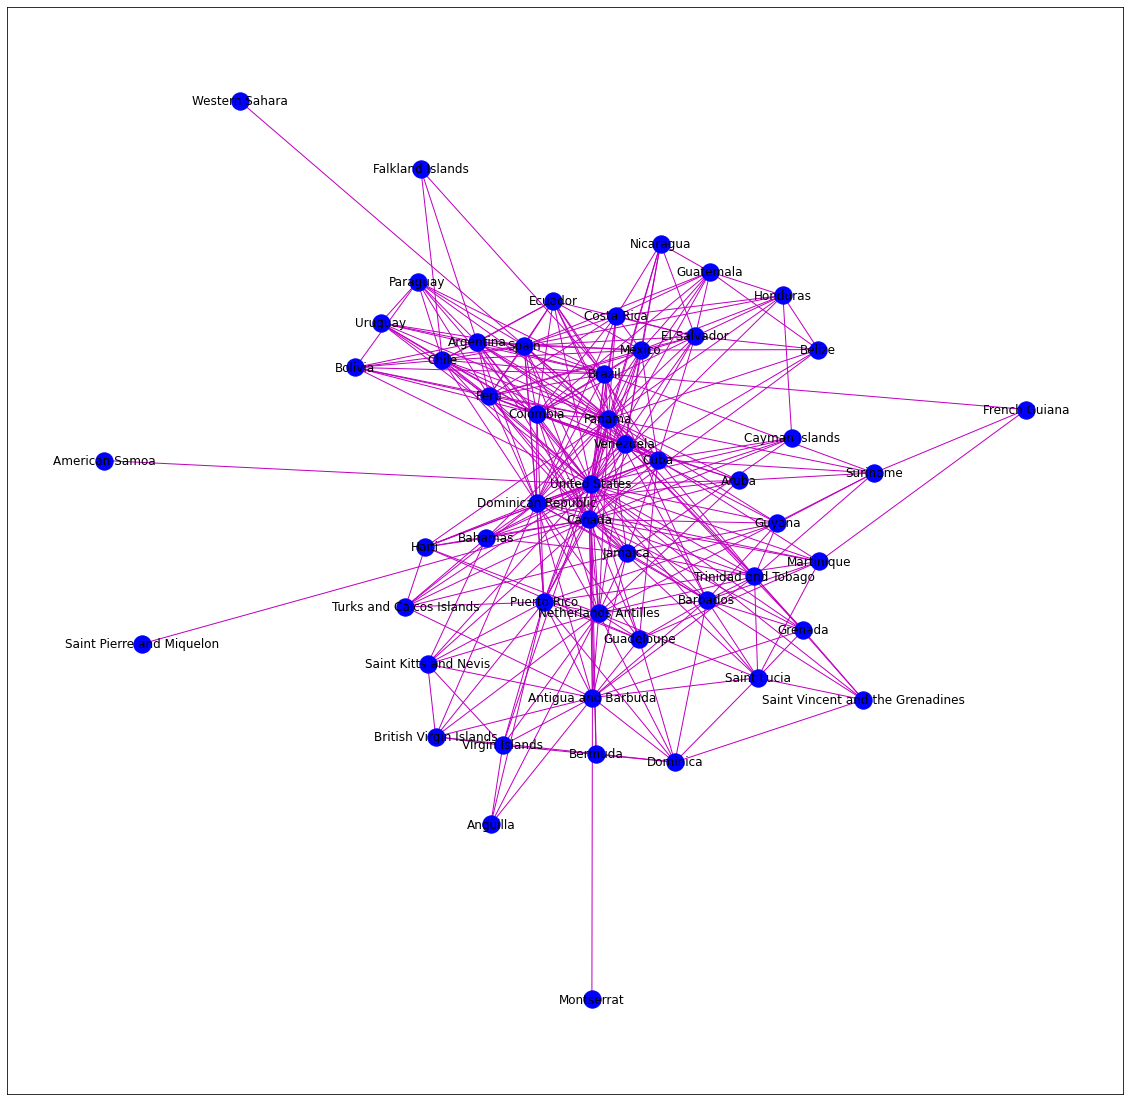

In [52]:
print("Visualizacion Comunidad:")
visualizar(communities[0],0,'b')

Visualizacion Comunidad:
1 



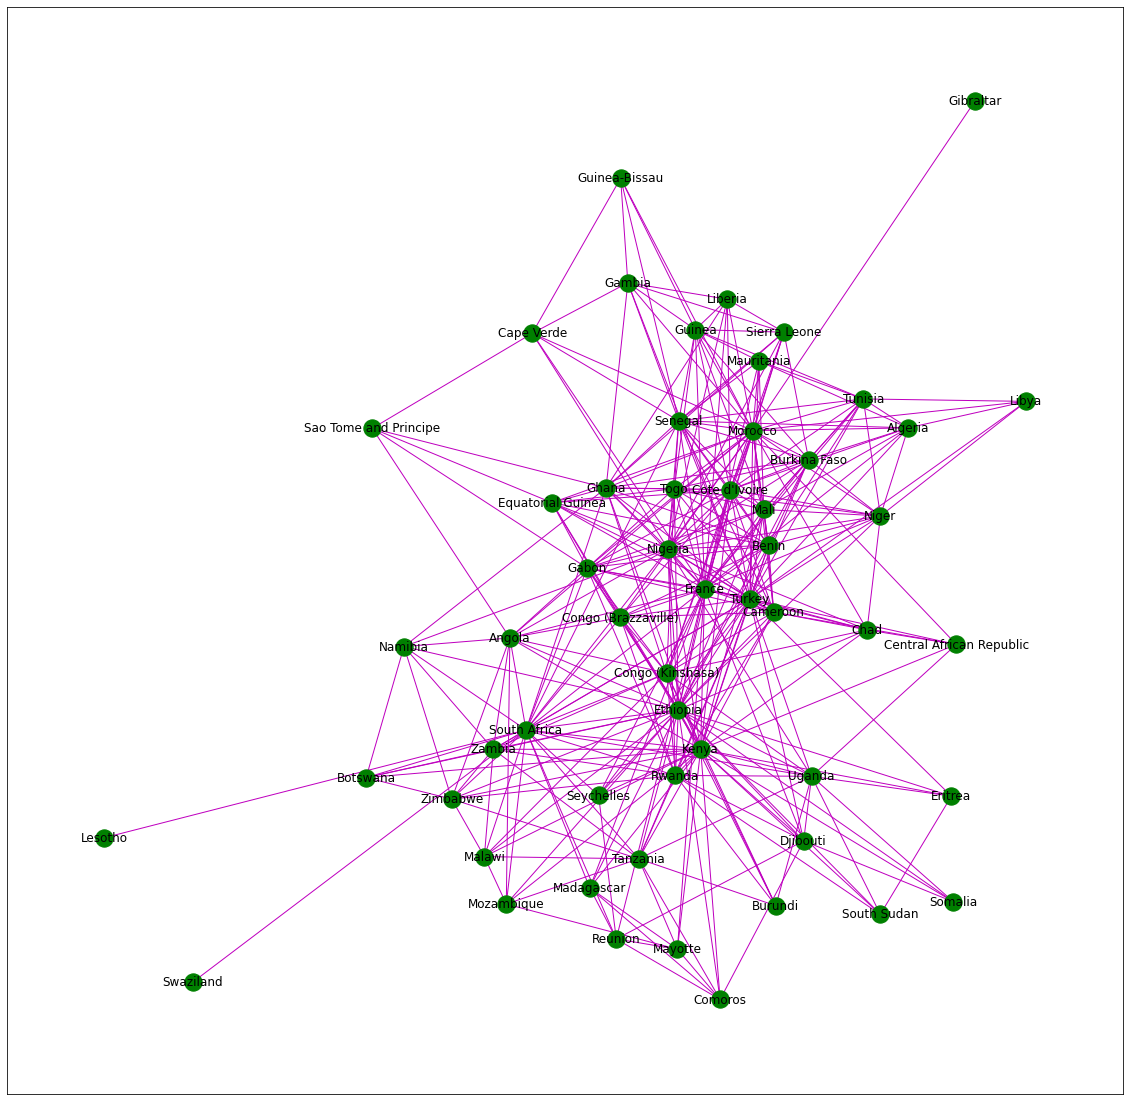

In [53]:
print("Visualizacion Comunidad:")
visualizar(communities[1],1,'g')

Visualizacion Comunidad:
2 



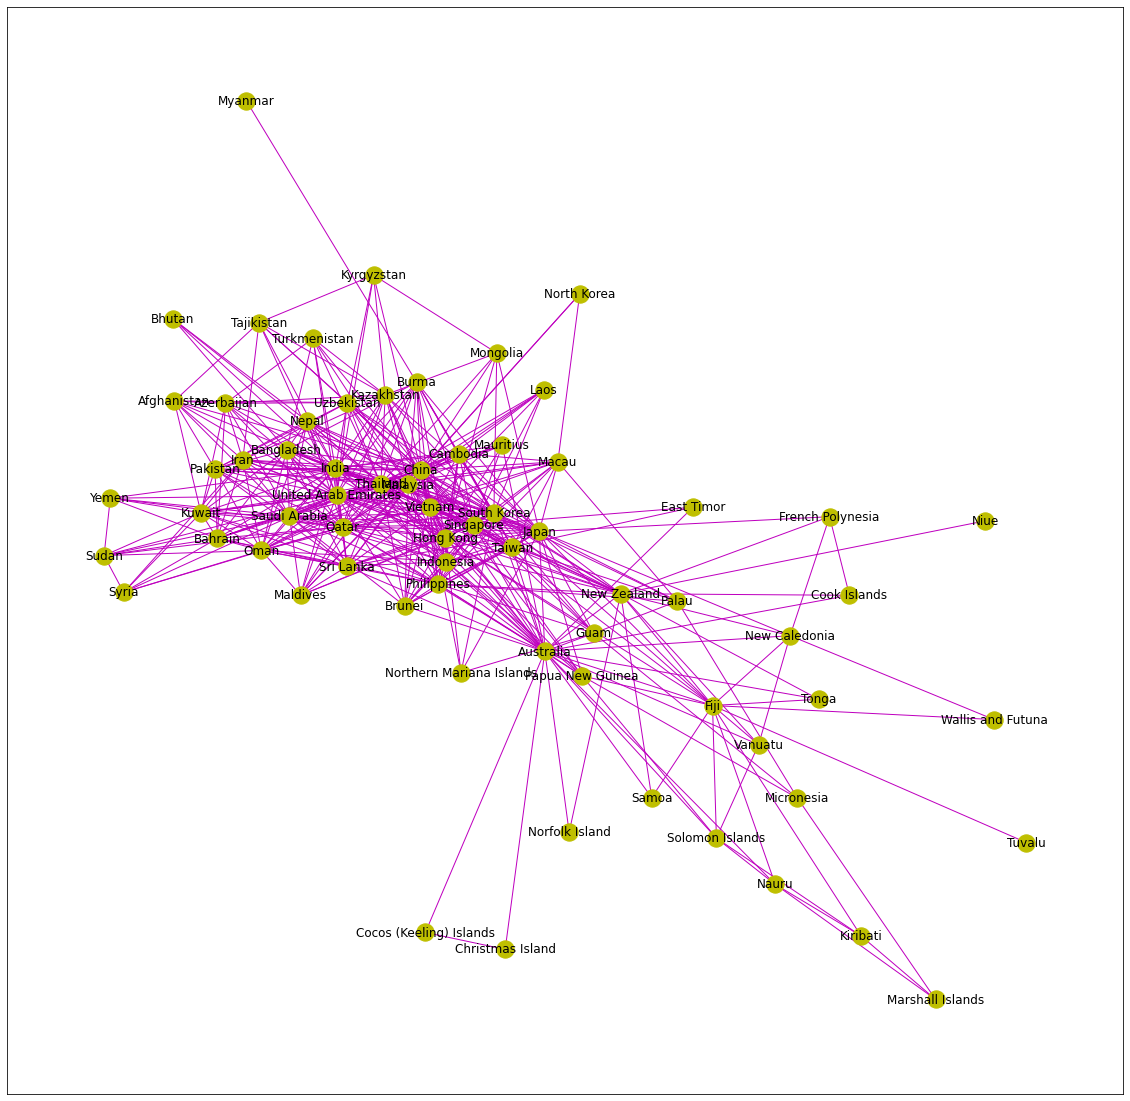

In [54]:
print("Visualizacion Comunidad:")
visualizar(communities[2],2,'y')

Visualizacion Comunidad:
3 



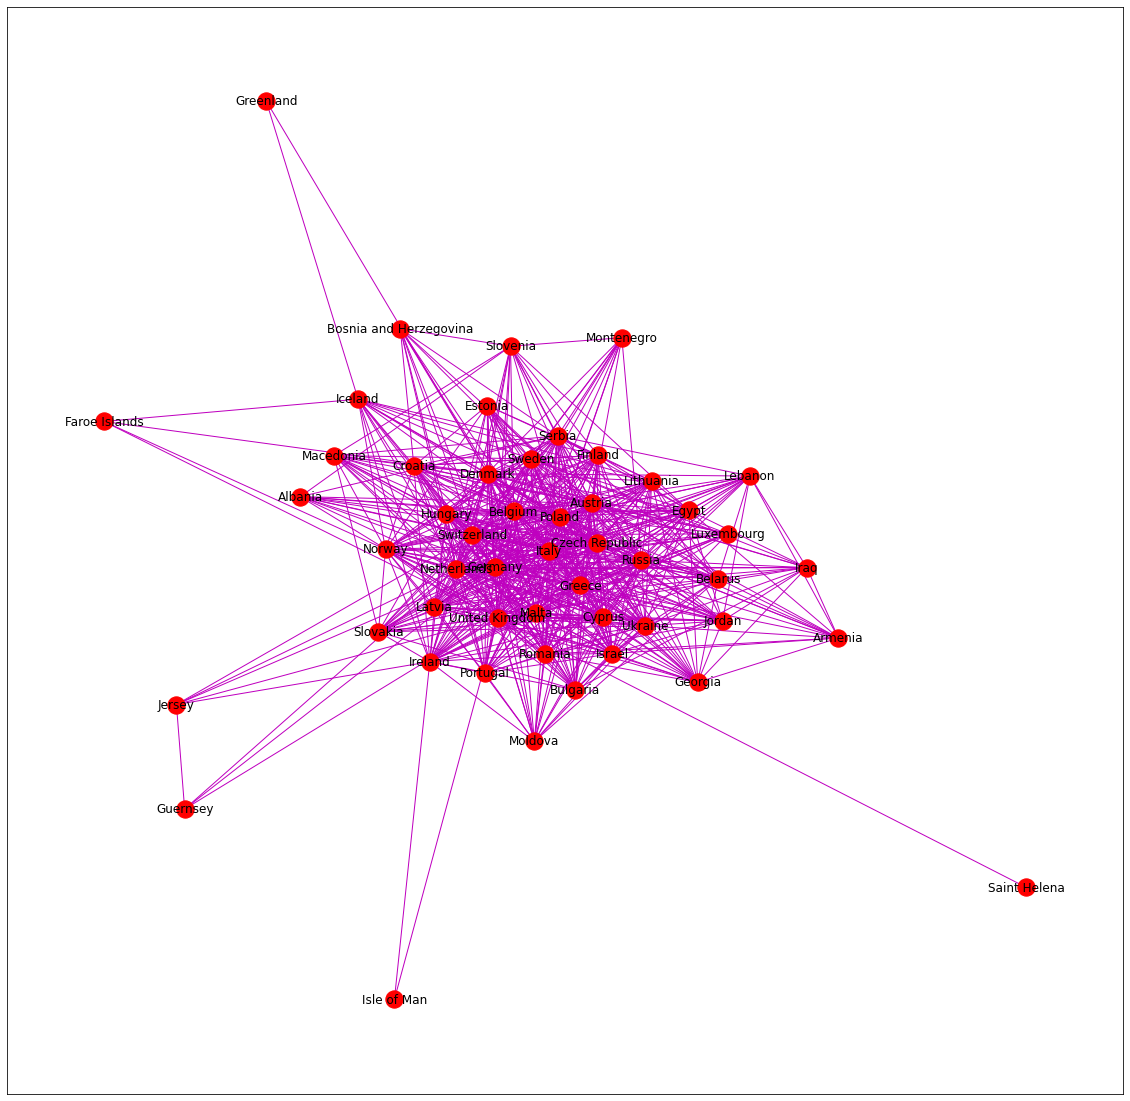

In [55]:
print("Visualizacion Comunidad:")
visualizar(communities[3],3,'r')

In [16]:
def aristas_que_cruzan(communitie, G):
    total=0
    nodo_actual=0
    vecinos = []
    subgraph=nx.Graph()
    subgraph= flights_graph.subgraph(list(communitie))
    for i in range(len(communitie)):
        nodo_actual= communitie[i]
        vecinos = list(G.neighbors(nodo_actual))
        for j in range(len(vecinos)):
            if not subgraph.has_node(vecinos[j]) :
                total= total +1
                
        
    return total

In [59]:
sum=0
for i in range(len(communities)):    
    print("Cantidad de aristas que cruzan de la comunidad",i,"-------->",aristas_que_cruzan(list(communities[i]), flights_graph))
    sum = sum +(aristas_que_cruzan(list(communities[i]), flights_graph))
print("Cantidad total de aristas que cruzan -------->",sum/2)    

Cantidad de aristas que cruzan de la comunidad 0 --------> 293
Cantidad de aristas que cruzan de la comunidad 1 --------> 477
Cantidad de aristas que cruzan de la comunidad 2 --------> 555
Cantidad de aristas que cruzan de la comunidad 3 --------> 747
Cantidad total de aristas que cruzan --------> 1036.0


SUBCOMUNIDADES 

SUBCOMUNIDAD ----> Proveniente de SUBRED : COMUNIDAD 0

In [60]:

import community
subgraph=nx.Graph()
subgraph= flights_graph.subgraph(list(communities[0]))
partition = community.community_louvain.best_partition(subgraph)
count=list(set([i for i in partition.values()]))
print("Cantidad de comunidades detectadas:",len(count))


Cantidad de comunidades detectadas: 4


In [63]:
subgraph_community_0=[]
subgraph_community_1=[]
subgraph_community_2=[]
subgraph_community_3=[]
subgraph_communities=[]
for i in partition.items():
     if i[1]==0:
        subgraph_community_0.append(i[0])
     if i[1]==1:
        subgraph_community_1.append(i[0])
     if i[1]==2:
        subgraph_community_2.append(i[0])
     if i[1]==3:
        subgraph_community_3.append(i[0])
            
subgraph_communities.append(subgraph_community_0)
subgraph_communities.append(subgraph_community_1) 
subgraph_communities.append(subgraph_community_2) 
subgraph_communities.append(subgraph_community_3) 

In [64]:
for i in range(len(subgraph_communities)):
    print("Comunidad ------>",i,":\n",subgraph_communities[i])

Comunidad ------> 0 :
 ['French Guiana', 'Suriname', 'Aruba']
Comunidad ------> 1 :
 ['Dominica', 'American Samoa', 'Guadeloupe', 'Puerto Rico', 'Grenada', 'Barbados', 'Montserrat', 'Trinidad and Tobago', 'British Virgin Islands', 'Saint Lucia', 'Anguilla', 'Netherlands Antilles', 'Antigua and Barbuda', 'Bermuda', 'Martinique', 'United States', 'Guyana', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Virgin Islands']
Comunidad ------> 2 :
 ['Colombia', 'Western Sahara', 'El Salvador', 'Peru', 'Honduras', 'Mexico', 'Belize', 'Guatemala', 'Falkland Islands', 'Uruguay', 'Argentina', 'Bolivia', 'Panama', 'Nicaragua', 'Chile', 'Brazil', 'Ecuador', 'Paraguay', 'Venezuela', 'Costa Rica', 'Spain']
Comunidad ------> 3 :
 ['Turks and Caicos Islands', 'Cayman Islands', 'Bahamas', 'Saint Pierre and Miquelon', 'Canada', 'Dominican Republic', 'Haiti', 'Jamaica', 'Cuba']


In [65]:
for i in range(len(subgraph_communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(subgraph_communities[i]))

Cantidad de nodos en la comunidad --------> 0 : 3
Cantidad de nodos en la comunidad --------> 1 : 20
Cantidad de nodos en la comunidad --------> 2 : 21
Cantidad de nodos en la comunidad --------> 3 : 9


Visualizacion Subcomunidad:
0 



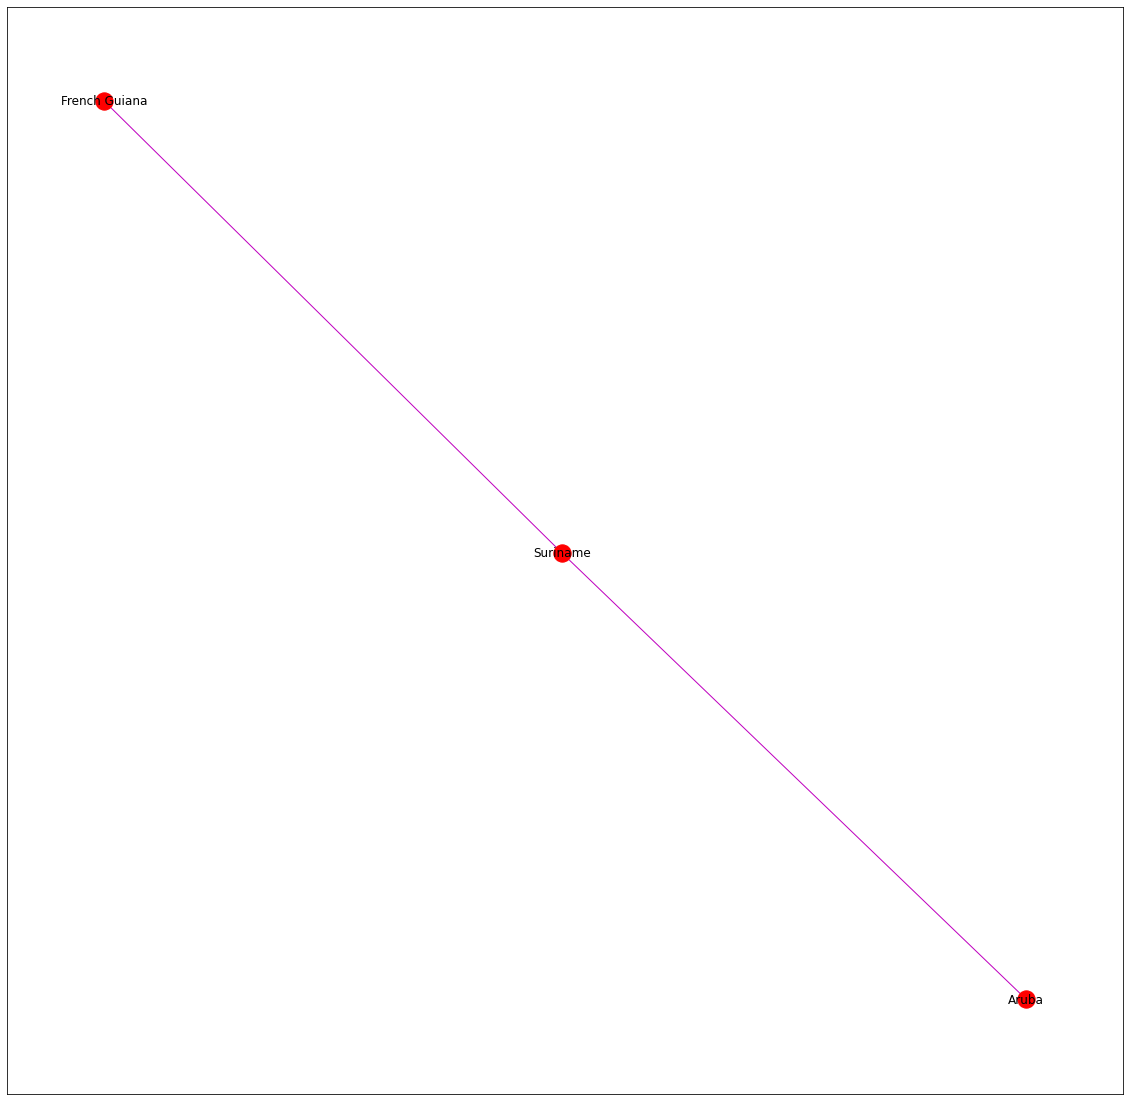

In [66]:
print("Visualizacion Subcomunidad:")
visualizar(subgraph_communities[0],0,'r')

Visualizacion Subcomunidad:
1 



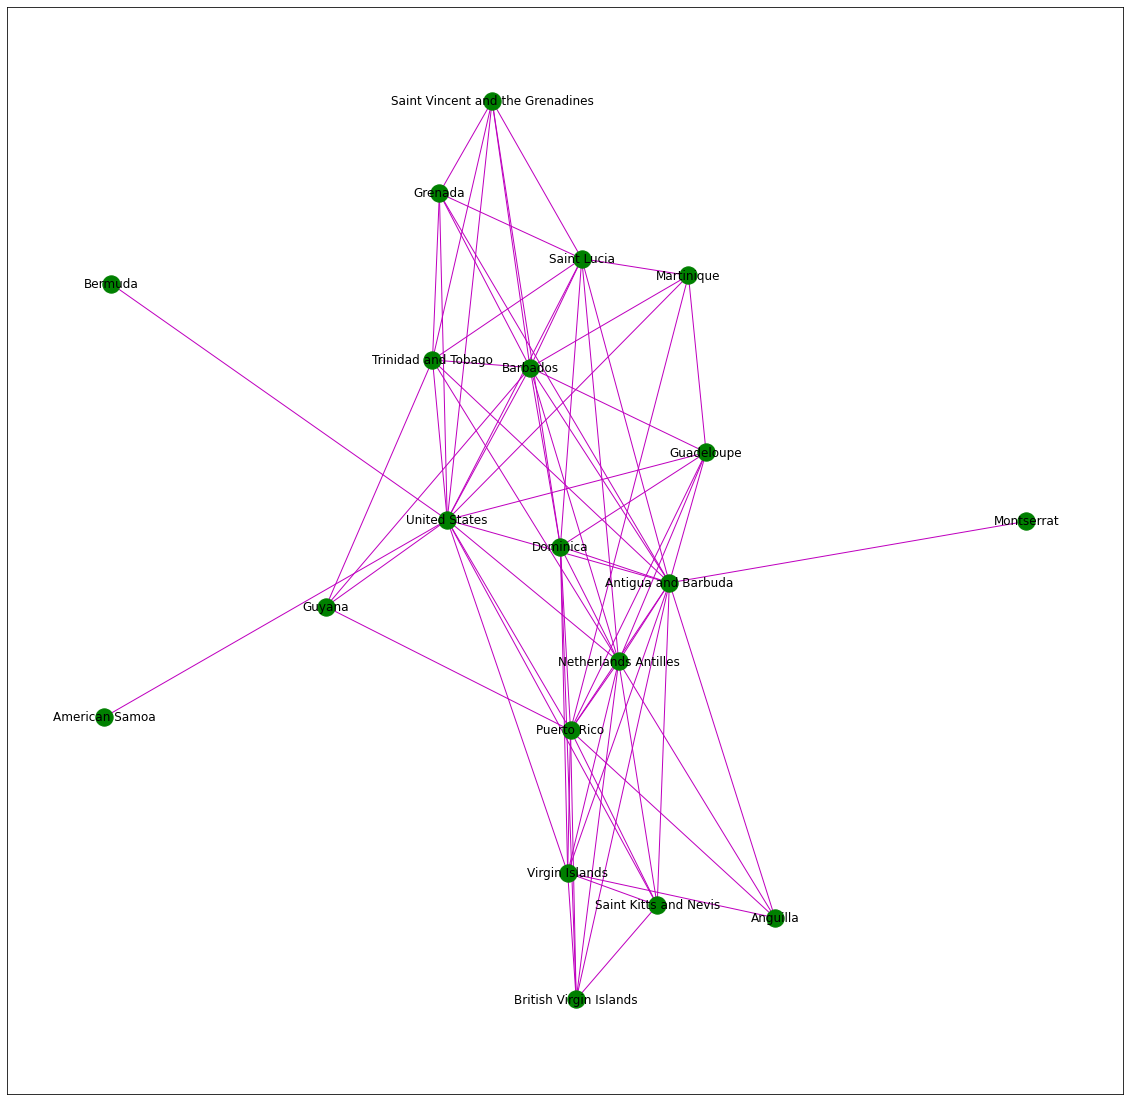

In [67]:
print("Visualizacion Subcomunidad:")
visualizar(subgraph_communities[1],1,'g')

Visualizacion Subcomunidad:
2 



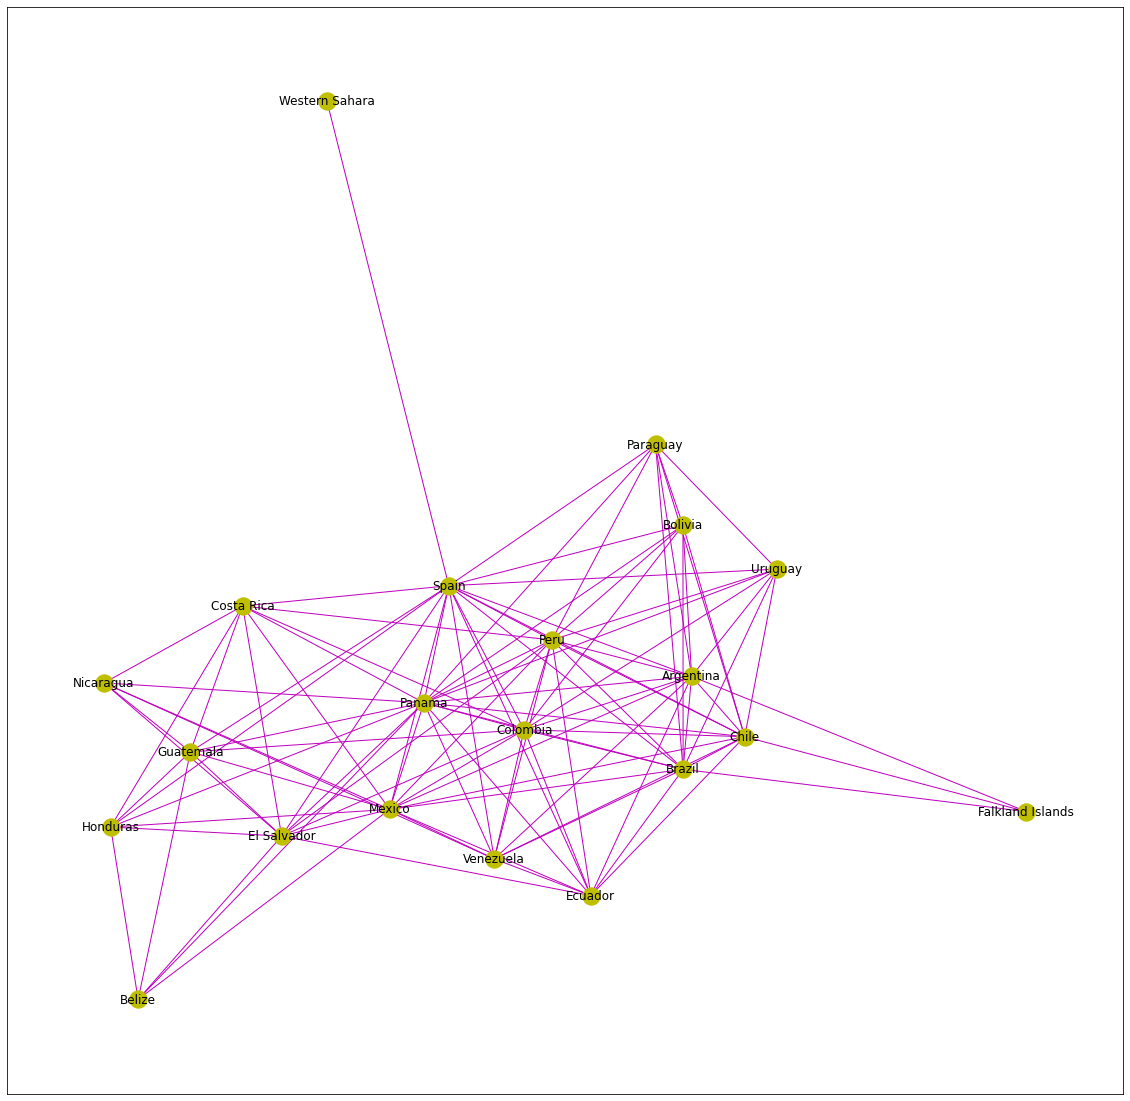

In [68]:
print("Visualizacion Subcomunidad:")
visualizar(subgraph_communities[2],2,'y')

Visualizacion Subcomunidad:
3 



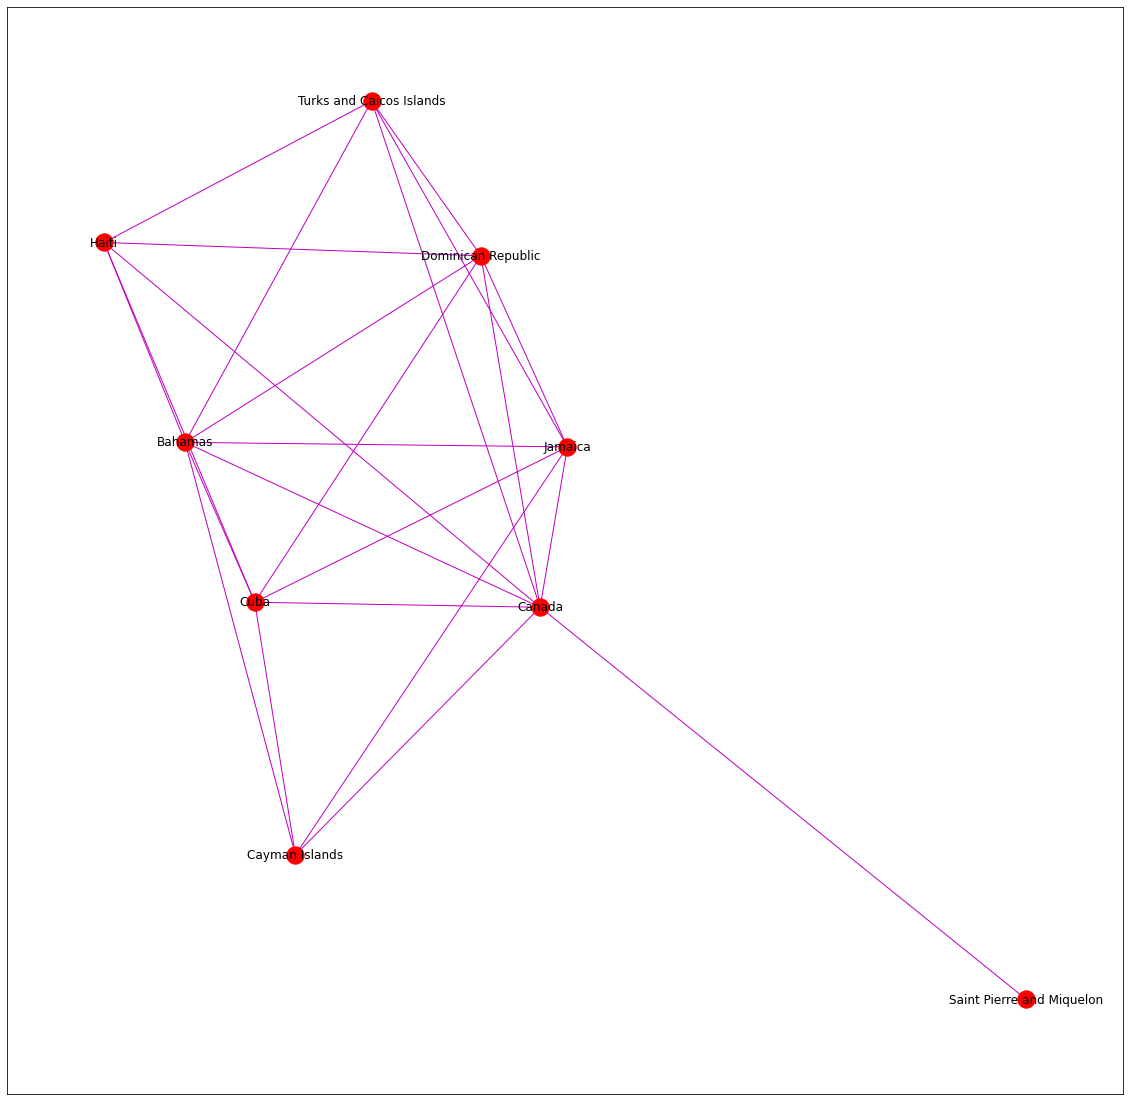

In [69]:
print("Visualizacion Subcomunidad:")
visualizar(subgraph_communities[3],3,'r')

MOTIFS 

MOTIF DE HASTA 5 NODOS --------> SUBRED : COMUNIDAD 0

In [26]:
from motifs.calculos import calcular_motifs, significance_profile, motif_grafo_eleatorios
from metricas import distribucion_grados
from modelos import configuration_model
from motifs.graficos import graficar_significant_profile

In [27]:
MAX_NODOS_MOTIFS = 5
motifs = calcular_motifs(subgraph, MAX_NODOS_MOTIFS)
print(motifs)

[  8241   2430  45998  42380   2612  67130  26485   6761 147677 438385
 138608 309742 217301 399181   3921  55062 501887  71977 286225   3240
  44934 101306 286242 230388  19793 241783  19884  77841  13020]


In [28]:
dist = distribucion_grados(subgraph)
promedios, stds = motif_grafo_eleatorios(lambda: configuration_model(dist), MAX_NODOS_MOTIFS, iters=20)


Iteracion 1
Iteracion 2; anterior: 1053.24 segs
Iteracion 3; anterior: 1156.64 segs
Iteracion 4; anterior: 1080.33 segs
Iteracion 5; anterior: 1038.28 segs
Iteracion 6; anterior: 994.18 segs
Iteracion 7; anterior: 933.60 segs
Iteracion 8; anterior: 982.55 segs
Iteracion 9; anterior: 944.00 segs
Iteracion 10; anterior: 960.34 segs
Iteracion 11; anterior: 1031.62 segs
Iteracion 12; anterior: 979.21 segs
Iteracion 13; anterior: 856.40 segs
Iteracion 14; anterior: 1078.73 segs
Iteracion 15; anterior: 935.62 segs
Iteracion 16; anterior: 985.36 segs
Iteracion 17; anterior: 1624.67 segs
Iteracion 18; anterior: 1036.17 segs
Iteracion 19; anterior: 961.37 segs
Iteracion 20; anterior: 1020.51 segs


In [29]:
SP = significance_profile(motifs, promedios, stds)
print("SP:", SP)

SP: [ 2.72380911e-03  1.18342411e-01 -3.71757155e-02 -1.90025833e-03
 -3.80592958e-02  5.51397717e-02  8.33578283e-02  2.55469424e-01
 -5.14791121e-02 -2.83324083e-02 -7.24157362e-04  5.23954954e-03
  4.48160098e-02  2.86957783e-02 -4.12548284e-02 -3.82455626e-02
  3.47645595e-02  1.51636784e-01  3.82703821e-02 -2.08361198e-02
 -3.91945062e-02  8.05719812e-02  1.41646932e-01  4.62757389e-02
 -2.00633779e-02  1.59333607e-01  8.89688895e-03  2.49816566e-01
  8.68222857e-01]


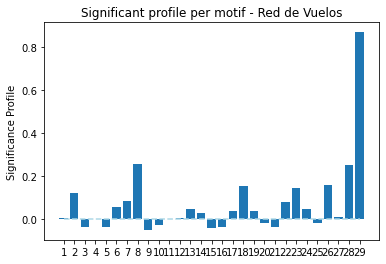

In [30]:
graficar_significant_profile(SP, 'Red de Vuelos')

ROLES

ROLES DENTRO DE RED DE VUELOS

In [70]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor
import warnings
import seaborn as sns

feature_extractor = RecursiveFeatureExtractor(flights_graph)
features = feature_extractor.extract_features()

# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles
print('\nNode role assignments:')
print(node_roles)



# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in flights_graph
node_colors = [role_colors[node_roles[node]] for node in flights_graph.nodes]


Node role assignments:
{'Afghanistan': 'role_1', 'Albania': 'role_2', 'Algeria': 'role_2', 'American Samoa': 'role_1', 'Angola': 'role_2', 'Anguilla': 'role_1', 'Antigua and Barbuda': 'role_1', 'Argentina': 'role_2', 'Armenia': 'role_1', 'Aruba': 'role_1', 'Australia': 'role_2', 'Austria': 'role_0', 'Azerbaijan': 'role_2', 'Bahamas': 'role_1', 'Bahrain': 'role_2', 'Bangladesh': 'role_2', 'Barbados': 'role_1', 'Belarus': 'role_2', 'Belgium': 'role_4', 'Belize': 'role_1', 'Benin': 'role_1', 'Bermuda': 'role_1', 'Bhutan': 'role_1', 'Bolivia': 'role_1', 'Bosnia and Herzegovina': 'role_2', 'Botswana': 'role_1', 'Brazil': 'role_2', 'British Virgin Islands': 'role_1', 'Brunei': 'role_1', 'Bulgaria': 'role_2', 'Burkina Faso': 'role_1', 'Burma': 'role_1', 'Burundi': 'role_1', 'Cambodia': 'role_1', 'Cameroon': 'role_1', 'Canada': 'role_2', 'Cape Verde': 'role_2', 'Cayman Islands': 'role_1', 'Central African Republic': 'role_1', 'Chad': 'role_1', 'Chile': 'role_2', 'China': 'role_2', 'Christmas 

In [71]:
count=list(set([i for i in node_roles.values()]))
print("Cantidad de roles detectados:",len(count))

Cantidad de roles detectados: 5


In [72]:
rol_1=[]
rol_2=[]
rol_3=[]
rol_4=[]
rol_5=[]
roles=[]
for i in node_roles.items():
     if i[1]=='role_0':
          rol_1.append(i[0])
     if i[1]=='role_1':
          rol_2.append(i[0])
     if i[1]=='role_2':
          rol_3.append(i[0])
     if i[1]=='role_3':
          rol_4.append(i[0]) 
     if i[1]=='role_4':
          rol_5.append(i[0])    

roles.append(rol_1)
roles.append(rol_2) 
roles.append(rol_3) 
roles.append(rol_4) 
roles.append(rol_5)

In [73]:
for i in range(len(roles)):
    print("Rol ------>",i,":\n",roles[i])


Rol ------> 0 :
 ['Austria', "Cote d'Ivoire", 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Greece', 'Hungary', 'India', 'Italy', 'Malaysia', 'Malta', 'Norway', 'Poland', 'Russia', 'Sweden', 'Switzerland', 'Thailand', 'Ukraine', 'United States']
Rol ------> 1 :
 ['Afghanistan', 'American Samoa', 'Anguilla', 'Antigua and Barbuda', 'Armenia', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Botswana', 'British Virgin Islands', 'Brunei', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Cayman Islands', 'Central African Republic', 'Chad', 'Christmas Island', 'Cocos (Keeling) Islands', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Cook Islands', 'Djibouti', 'Dominica', 'East Timor', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Falkland Islands', 'Faroe Islands', 'Fiji', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Gibraltar', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', '

Visualizacion Rol:
0 



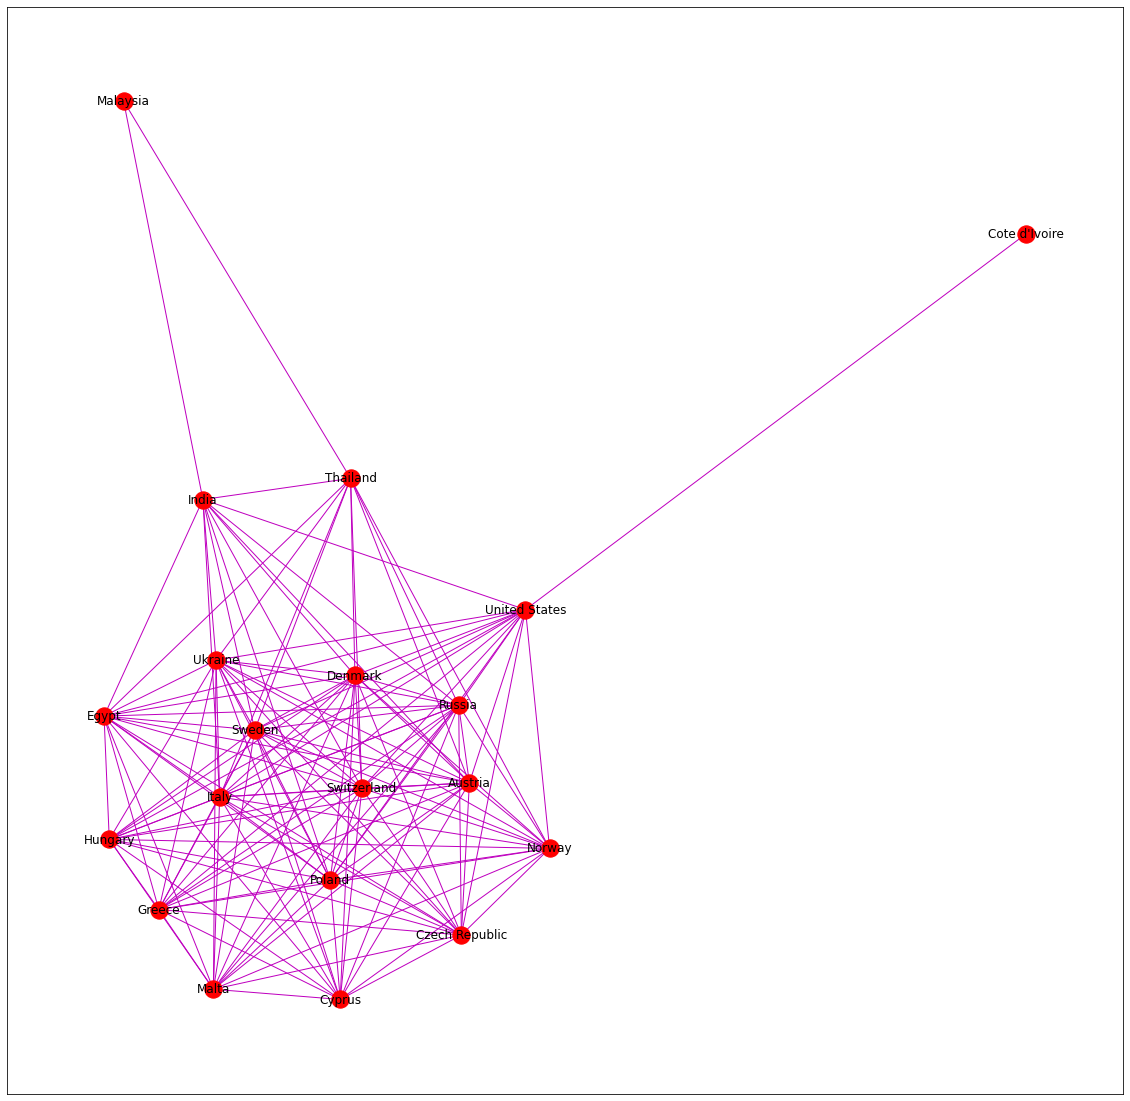

In [75]:
print("Visualizacion Rol:")
visualizar(roles[0],0,'r')

Visualizacion Rol:
1 



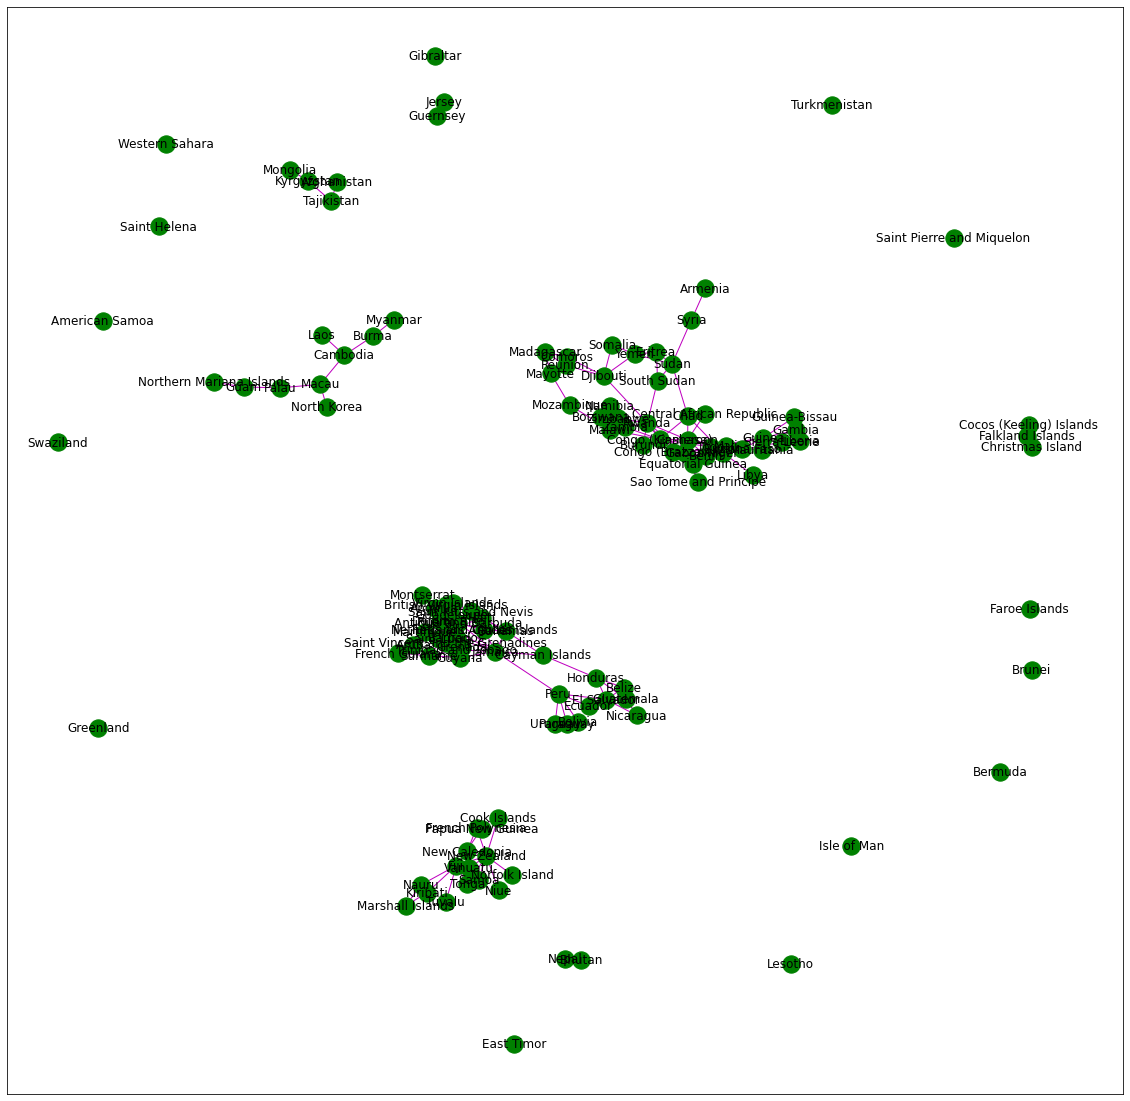

In [76]:
print("Visualizacion Rol:")
visualizar(roles[1],1,'g')

Visualizacion Rol:
2 



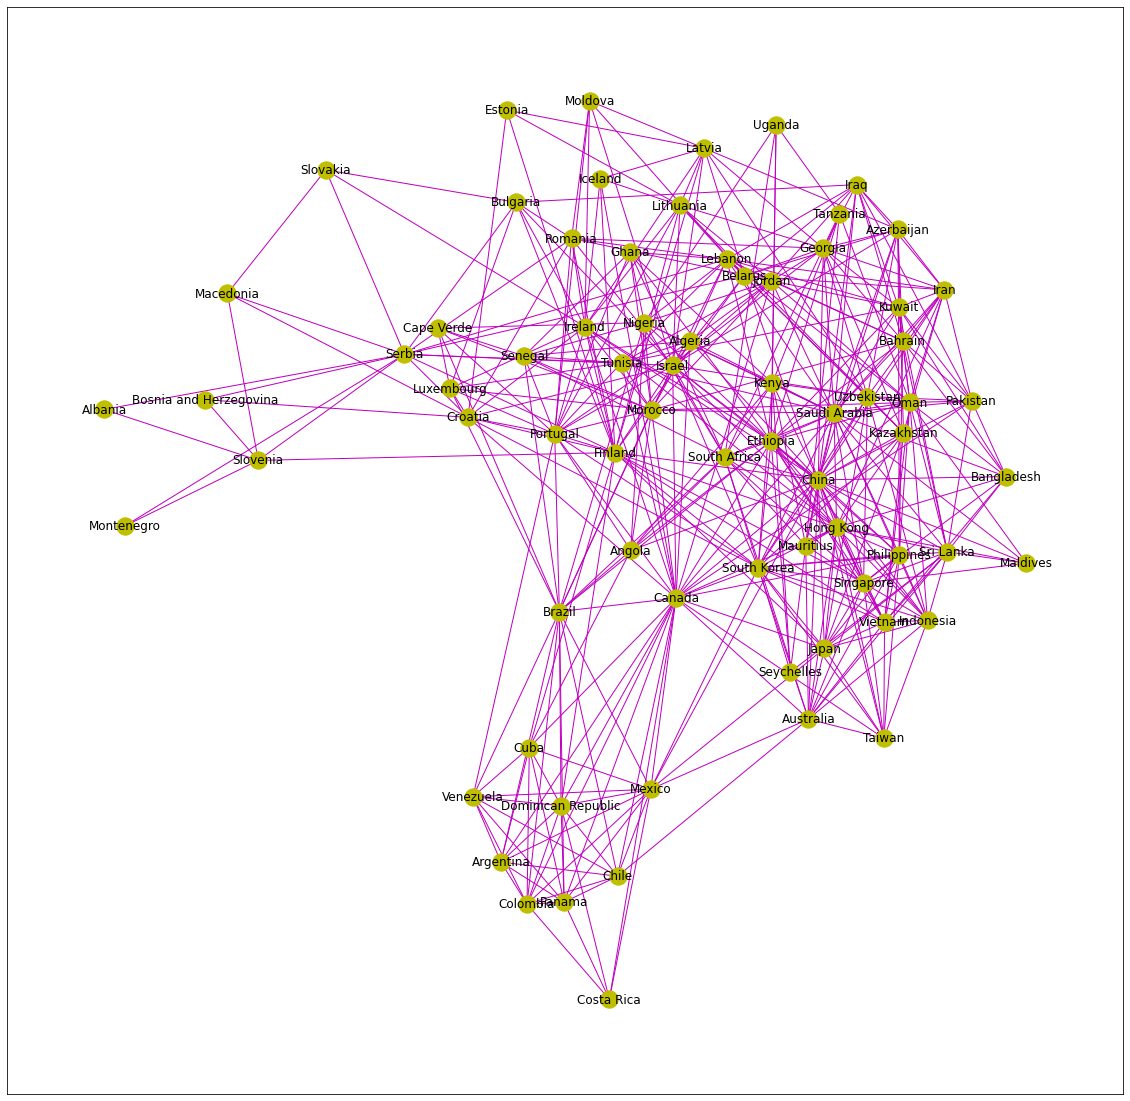

In [77]:
print("Visualizacion Rol:")
visualizar(roles[2],2,'y')

Visualizacion Rol:
3 



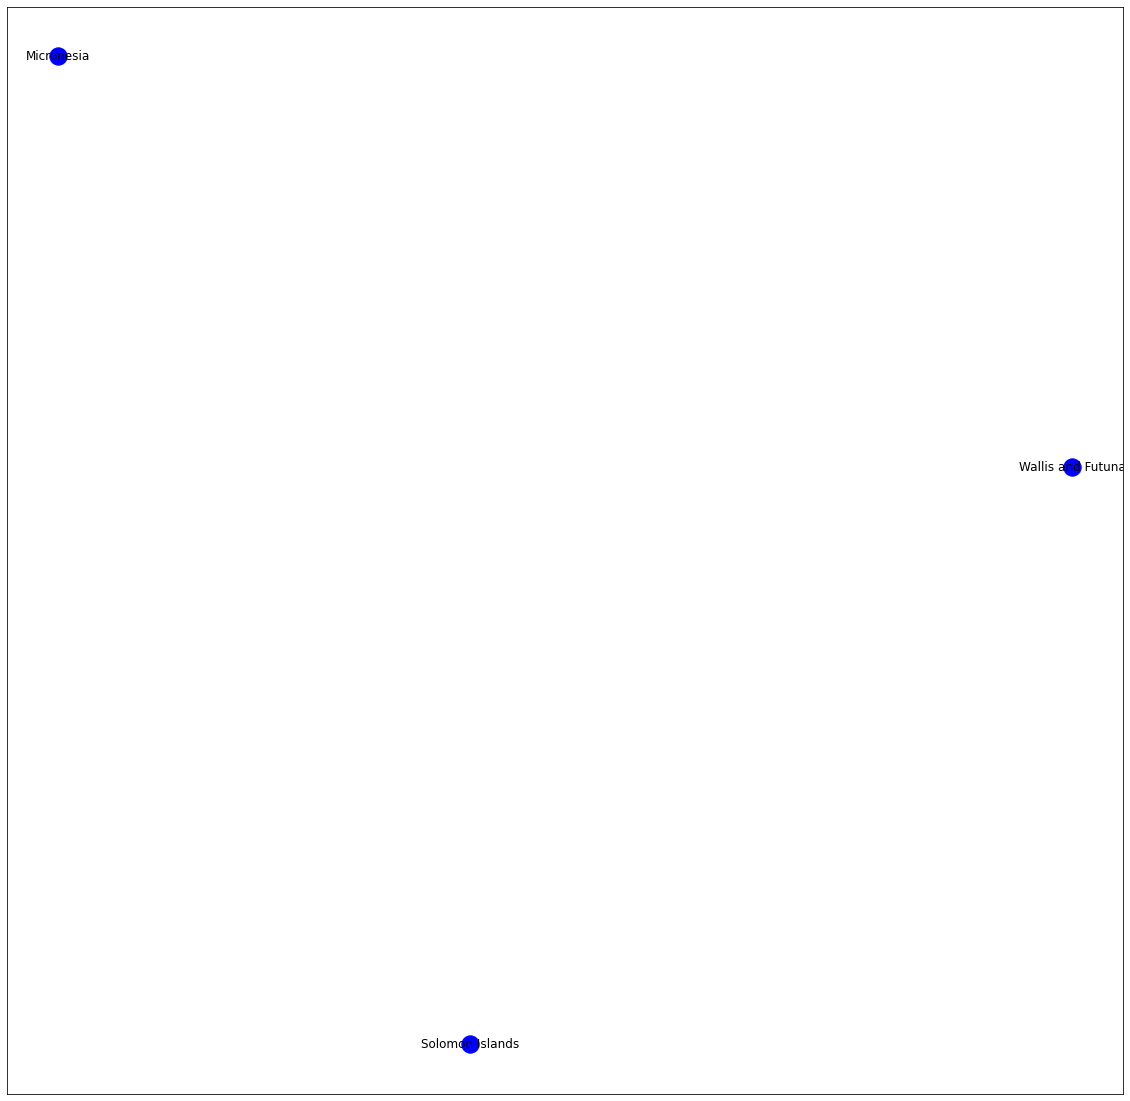

In [78]:
print("Visualizacion Rol:")
visualizar(roles[3],3,'b')

Visualizacion Rol:
4 



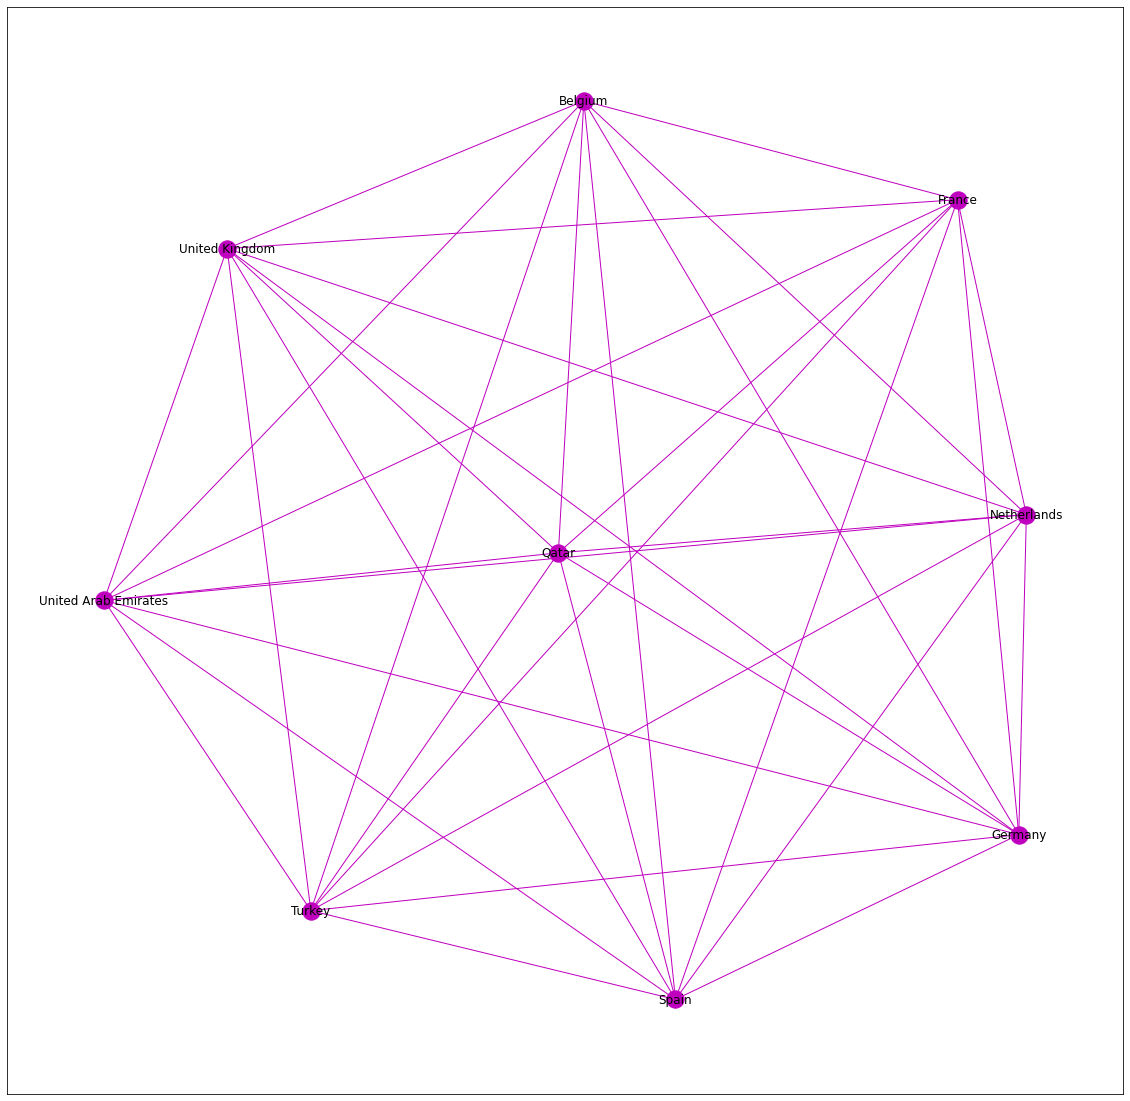

In [79]:
print("Visualizacion Rol:")
visualizar(roles[4],4,'m')

In [82]:
print("GRAFICO DE ROLES")

GRAFICO DE ROLES


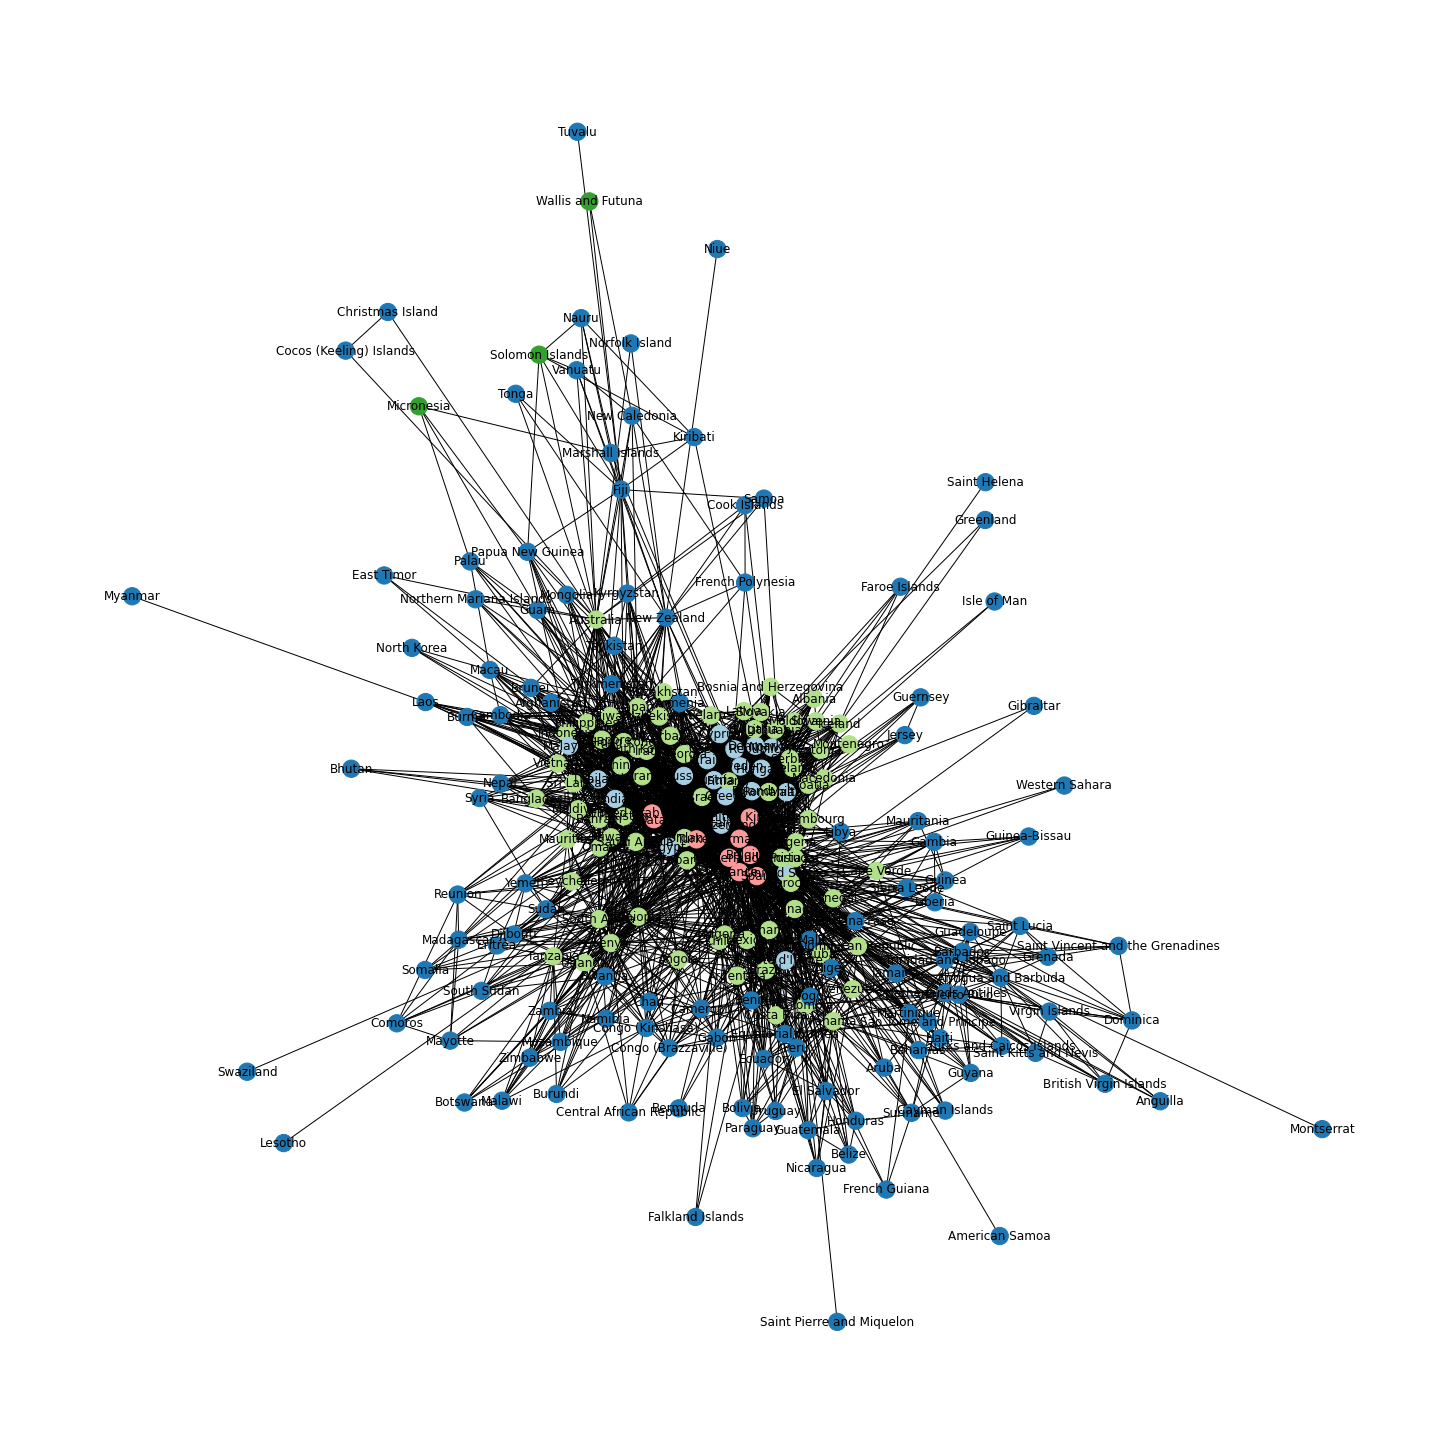

In [80]:
# plot graph
plt.figure(figsize=(20,20))

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        flights_graph,
        pos=nx.spring_layout(flights_graph, seed=42),
        with_labels=True,
        node_color=node_colors,
    )

plt.show()